## **THE SPARKS FOUNDATION**


### **TASK 1-Simple Linear Regression**


### **BY YASHADA MILIND THOMBRE**

### **1.Importing Libraries**

In [31]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split


### **2.Data Reading And Exploration**

In [34]:
# Reading data from given link
my_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")



Data imported successfully


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [35]:
my_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
my_data.columns

Index(['Hours', 'Scores'], dtype='object')

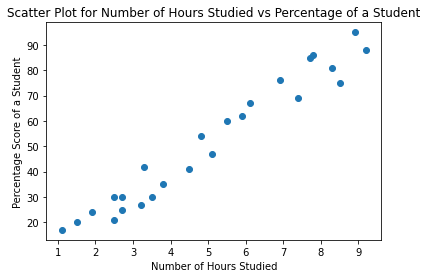

In [8]:
# Plotting the distribution of scores
plt.title('Scatter Plot for Number of Hours Studied vs Percentage of a Student')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score of a Student')  
plt.scatter(my_data['Hours'], my_data['Scores'])
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [36]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print(X_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [37]:
from sklearn.linear_model import LinearRegression  
my_linear = LinearRegression()  
my_linear.fit(X_train, y_train) 

print("Training complete.")

Training complete.


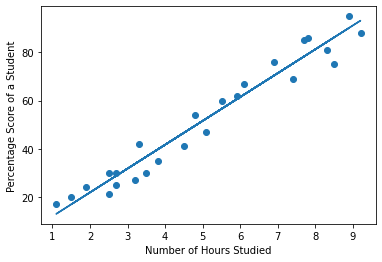

In [38]:
# Plotting the regression line
line = my_linear.coef_*X+my_linear.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage Score of a Student')
plt.plot(X, line);
plt.show()

In [39]:
print(my_linear.coef_)
print(my_linear.intercept_)

[9.91065648]
2.018160041434683


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [40]:
print(X_test) # Testing data - In Hours
y_pred = my_linear.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [41]:
# Comparing Actual vs Predicted
X_test1=X_test.flatten()
print(X_test1)
df = pd.DataFrame({'Scores':X_test1,'Actual': y_test, 'Predicted': y_pred})  
df 

[1.5 3.2 7.4 2.5 5.9]


,Scores,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [42]:
# test with own data
hours = 9.25
h1=np.array(hours).reshape(-1,1)
own_pred = my_linear.predict(h1)
print("Number of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours Studied = 9.25
Predicted Score = 93.69173248737538


In [44]:
#My Dummy data
hours = 7.56
h1=np.array(hours).reshape(-1,1)
own_pred = my_linear.predict(h1)
print("Number of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours Studied = 7.56
Predicted Score = 76.94272303508998


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [30]:
from sklearn import metrics  
absolute_error=    metrics.mean_absolute_error(y_test, y_pred)
print("Absolute Error=",absolute_error)

Absolute Error= 4.183859899002975
